# IFN619 - Assignment 1 - Part B

## Foundational Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Complete the full **QDAVI** data analytics cycle for both questions. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
4. Ensure that your code runs without errors, and that your results are appropriate for the question.
5. Use comments in your code to explain what you are doing

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import display, HTML

first_name = "Anjana"
last_name = "Ranjan"
student_number = "n11119985"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---

## QUESTION 1

#### Question: 

Using *Bureau of Meteorology* Climate Data Online, investigate the daily rainfall for Brisbane and identify significant periods of time during the last 3 years. Once you have found significant periods of time, compare Brisbane's rainfall for those periods with another Australian city of your choice. What insights can be gained from your analysis, and who might benefit from them?

#### Data:

[BOM Climate Data Online](http://www.bom.gov.au/climate/data/index.shtml?bookmark=136)


In [2]:
# import libraries for this question here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

### 1.1 Question

It has been noticed that Queensland, especially Brisbane and the surrounding Surburbs has been facing unusually high rainfall since the beginning of 2022. 
- Is there a sudden change in climate? What can we attribute these changes to? 
- Is a similar pattern being noticed in previous years as well?
- Do other major cities and States in Australia also face a similar issue? 
- How much more rainfall does Brisbane recieve when compared to other Australian cities? 

To answer these questions, we will analyse the weather data obtained from *Bureau of Meteorology* Climate Data Online. We will analyse over a peroid of ~2.25 years, starting from 2022 and ending at March 2022. 
<br>
We will identify periods of significant rainfall over a range of days. This amount of rainfall must be higher than average.
<br>
We will then compare the rainfall in Brisbane to the rainfall in Perth, which is another city in the west coast of Australia. I have chosen Perth because Perth and Brisbane are on opposite coasts so we can see some contrasting results. Both cities are exposed to costal winds. It will be nice to compare the weather in the East coast vs that of the West Coast.
<br>
After visualizing and comparing the rainfall, we will try to derive insights of what we learned from the analysis. This is key information required for our stakeholders to know what is happening. Our key stakeholders can be:
- Australian Meteorology department 
- Meteorologists and Research Meteorologists
- Weather Forecasters
- Weather Presenters
- Industrial Entreprises, Radio and Television stations
- Residents of Queensland, especially Brisbane

This analysis should be able to help us figure out if the weather is any different from last year, if it is confined to Brisbane or consistent throughout the country. It will help our key stakeholders and residents know and prepare themselves before an unforseen situation occurs in the same time of the year next year. If we identify the causes, we can predict these situations.

### 1.2 Data

We will be analysing data over Brisbane and Perth for the years 2020, 2021 and 2022. The data is obtained from [BOM Climate Data Online](http://www.bom.gov.au/climate/data/index.shtml?bookmark=136) and is downloaded and stored as CSV files in our data folder. Let us import this data.

In [3]:
# Import the data
bne2020 = pd.read_csv("data/brisbane_2020rainfall.csv")
bne2021 = pd.read_csv("data/brisbane_2021rainfall.csv")
bne2022 = pd.read_csv("data/brisbane_2022rainfall.csv")
per2020 =pd.read_csv("data/perth_2020rainfall.csv")
per2021 =pd.read_csv("data/perth_2021rainfall.csv")
per2022 =pd.read_csv("data/perth_2022rainfall.csv")

# Clean/prepare the data for analysis
#Concatenating the data into a single  DataFrame for a holisitic view
brisbane = [bne2020, bne2021, bne2022]
brisbane_df = pd.concat(brisbane)
# bris2020
# brisbane_df['Period over which rainfall was measured (days)'].unique()
brisbane_df

,Product code,Bureau of Meteorology station number,Year,Month,Day,Rainfall amount (millimetres),Period over which rainfall was measured (days),Quality
0,IDCJAC0009,40913,2020,1,1,0.4,1.0,N
1,IDCJAC0009,40913,2020,1,2,0.0,1.0,N
2,IDCJAC0009,40913,2020,1,3,0.0,1.0,N
3,IDCJAC0009,40913,2020,1,4,0.0,1.0,N
4,IDCJAC0009,40913,2020,1,5,0.0,1.0,N
...,...,...,...,...,...,...,...,...
104,IDCJAC0009,40913,2022,4,15,0.2,1.0,N
105,IDCJAC0009,40913,2022,4,16,0.0,1.0,N
106,IDCJAC0009,40913,2022,4,17,0.0,1.0,N
107,IDCJAC0009,40913,2022,4,18,0.0,1.0,N


##### Understanding the data

In [4]:
brisbane_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 108
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Product code                                    840 non-null    object 
 1   Bureau of Meteorology station number            840 non-null    int64  
 2   Year                                            840 non-null    int64  
 3   Month                                           840 non-null    int64  
 4   Day                                             840 non-null    int64  
 5   Rainfall amount (millimetres)                   805 non-null    float64
 6   Period over which rainfall was measured (days)  805 non-null    float64
 7   Quality                                         805 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 59.1+ KB


The data seems to be mostly complete. We will be analysing over the complete parts of data, hence we are temporarirly ignoring the null values.

In [5]:
np.unique(brisbane_df["Period over which rainfall was measured (days)"])

array([ 1., nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

Period over which rainfall was measured (days) doesn't seem to have any value other than 1.

In [6]:
brisbane_df["Quality"].unique()
brisbane_df["Quality"].value_counts()

N    804
Y      1
Name: Quality, dtype: int64

We have only 1 day that went through quality control process and is fully acceptable

##### Selecting columns required for our analysis

The following table contains a description of all the information provided to us by the Bureau of Meteorology. We want to select columns necessary for our analysis and provide a justification for our choice.


| Column Name                                    	| Description                                                                                                        	| Necessary(Y/N) 	| Justification                                                                                                        	|
|------------------------------------------------	|--------------------------------------------------------------------------------------------------------------------	|----------------	|----------------------------------------------------------------------------------------------------------------------	|
| Product Code                                   	| Monthly rainfall product code. [Information Unclear]                                              	| N              	| This is not necessary for our analysis as it is not valuable information to us.                                      	|
| Bureau of Meteorology Station Number           	| The station number of the region selected based on which the Meteorology department divides and measures rainfall  	| N              	| Since we are selecting only one region in this case, this value is constant across the dataframe and can be ignored. 	|
| Year                                           	| Year- Part of Date                                                                                                 	| Y              	|                                                                                                                      	|
| Month                                          	| Month- Part of Date                                                                                                	| Y              	|                                                                                                                      	|
| Day                                            	| Day- Part of Date                                                                                                  	| Y              	| These 3 columns make up the Date. We need them to identify rainfall on different dates.                              	|
| Rainfall amount (millimeters)                  	| The amount of rainfall on the date in the region                                                                   	| Y              	| Gives us the amount of rainfall. This is the most integral attribute that forms the basis of our analysis                                                                                      	|
| Period over which rainfall was measured (days) 	| Over how many days was the rainfall measured.                                                                      	| N              	|    Rainfall on each day is measured seperately. The value of this column is most consistently 1. Therefore, it is not an integral column for our analysis                                                  	|
| Quality                                        	| Y: completed quality control and acceptable </br>N: not yet completed quality control process, quality not assured 	| N              	| This value is mostly N for the past 3 years, not a very useful property                                              	|

In [7]:
#Select necessary columns
necessary_columns = ['Year', 'Month', 'Day', 'Rainfall amount (millimetres)']
bne2020 = bne2020[necessary_columns]
bne2021 = bne2021[necessary_columns]
bne2022 = bne2022[necessary_columns]
bne_rf = brisbane_df[necessary_columns]


In [8]:
bne_rf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 108
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           840 non-null    int64  
 1   Month                          840 non-null    int64  
 2   Day                            840 non-null    int64  
 3   Rainfall amount (millimetres)  805 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 32.8 KB


The above Data does not contain null values and is clean

### 1.3 Analysis

Let us analyse which are the rainy months in Brisbane

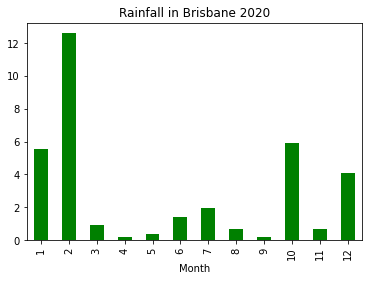

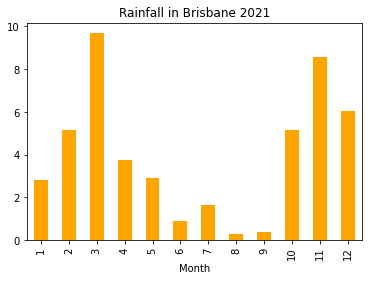

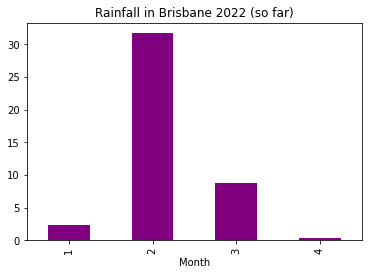

In [9]:
# bne2020.plot(x ='Month', y='Rainfall amount (millimetres)', kind = 'bar')
bne2020_grouped = bne2020.groupby(bne2020.Month)['Rainfall amount (millimetres)'].mean()
bne2020_grouped.plot(kind= "bar", title = "Rainfall in Brisbane 2020", color = "green")
plt.show()
bne2022_grouped = bne2021.groupby(["Month"])['Rainfall amount (millimetres)'].mean()
bne2022_grouped.plot(kind= "bar", title = "Rainfall in Brisbane 2021", color = "orange")
plt.show()
bne2022_grouped = bne2022.groupby(["Month"])['Rainfall amount (millimetres)'].mean()
bne2022_grouped.plot(kind= "bar", title = "Rainfall in Brisbane 2022 (so far)", color = "purple")
plt.show()
# brisbane_df_grouped = brisbane_df.groupby(["Month", "Year"])['Rainfall amount (millimetres)'].mean().plot.bar(title = "2022")
# bne2020_grouped.show()

If we consider January to be the start of the seasonal year, rainfall is moderate in Januray and goes up in February and then slowly starts coming down until the month of October. The wet months carry over to November, December and the following year.
Trends noticed: 
* Wet season ranges over a period of 5-6 months
* Mean rainfall is highest in the month of February 
* Amount of rainfall seems to be increasing per year
* In 2022, Brisbane had record high rainfall 
* General trend shows August and September are dry months


##### Analysing the data to find significant periods of Rainfall

In [10]:
# Analyse the data - ensure that you at least use the required technique

#Find periods of significant rainfall over the brisbane dataset

bne_dsc = bne_rf.describe()
bne_dsc


,Year,Month,Day,Rainfall amount (millimetres)
count,840.000000,840.000000,840.000000,805.000000
mean,2020.694048,5.978571,15.586905,4.521242
std,0.687337,3.533193,8.779490,18.007130
min,2020.000000,1.000000,1.000000,0.000000
25%,2020.000000,3.000000,8.000000,0.000000
50%,2021.000000,6.000000,15.500000,0.000000
75%,2021.000000,9.000000,23.000000,0.800000
max,2022.000000,12.000000,31.000000,228.400000


In [11]:
bne_rf.head()

,Year,Month,Day,Rainfall amount (millimetres)
0,2020,1,1,0.4
1,2020,1,2,0.0
2,2020,1,3,0.0
3,2020,1,4,0.0
4,2020,1,5,0.0


The highest recorded value of rainfall in Brisbane is 228.4 and the mean is 4.96. This means the data is scattered across a very high range and we cannot get a threshold out of these values. For finding a suitable threshold, one strategy would be to filter out the values greater than this mean and then find a mean/median value to get significant amounts of rainfall.

In [12]:

bne_rf= bne_rf.loc[bne_rf['Rainfall amount (millimetres)'] > bne_dsc["Rainfall amount (millimetres)"]["mean"]]
bne_rf.shape

(123, 4)

We cut down from 840 to 123 rows, now we try and find periods of prolonged rainfall. This is done by getting the difference of dates or consequtive rows of dates after applying our previous filter.

In [13]:
# bne_rf["diffs"] = np.diff(bne_rf.index.values)

# bne_rf

diffs = np.diff(bne_rf.index.values)
diffs = np.insert(diffs, 0, 0)

bne_rf["diffs"] = diffs
bne_rf

,Year,Month,Day,Rainfall amount (millimetres),diffs
11,2020,1,12,15.0,0
15,2020,1,16,16.0,4
16,2020,1,17,30.8,1
17,2020,1,18,71.6,1
18,2020,1,19,21.6,1
...,...,...,...,...,...
84,2022,3,26,56.2,19
85,2022,3,27,6.2,1
86,2022,3,28,44.6,1
87,2022,3,29,63.8,1


In [14]:
#Choosing consequtive days
bne_rf_conseq = bne_rf[bne_rf['diffs'] == 1]
bne_rf_conseq

,Year,Month,Day,Rainfall amount (millimetres),diffs
16,2020,1,17,30.8,1
17,2020,1,18,71.6,1
18,2020,1,19,21.6,1
37,2020,2,7,96.4,1
40,2020,2,10,26.4,1
41,2020,2,11,30.8,1
44,2020,2,14,36.6,1
162,2020,6,11,5.4,1
299,2020,10,26,33.8,1
302,2020,10,29,23.8,1


Looking at this data helps us select ranges of dates for our visualization. These are the ranges I will be choosing for comparison:
- Feb 4 to Feb 14 2020
- Dec 10 to Dec 20 2020
- Mar 15 to Mar 25 2021
- Dec 20 to Dec 30 2021
- Feb 18 to Feb 28 2022

 

### 1.4 Visualisation

We have figured out which date sectors we want to visualize. Let us now process the dataframe to facilitate visualisation. We will be merging the dataframes for Brisbane, merge it with Perth and compare the rainfall over the above date sectors.

In [15]:
# Visualise the results

#Prepare data for visualisation

#Merging the datasets 
brisbane = [bne2020, bne2021, bne2022]
brisbane_df = pd.concat(brisbane).astype(str)

perth = [per2020, per2021, per2022]
perth_df = pd.concat(perth).astype(str)

brisbane_df_vis = brisbane_df[necessary_columns]
brisbane_df_vis['Date'] = brisbane_df[['Year', 'Month', 'Day']].agg('-'.join, axis=1)
brisbane_df_vis['Date'] = brisbane_df_vis['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d', infer_datetime_format=True))

perth_df_vis = perth_df[necessary_columns]
perth_df_vis['Date'] = perth_df[['Year', 'Month', 'Day']].agg('-'.join, axis=1)
perth_df_vis['Date'] = perth_df_vis['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d', infer_datetime_format=True))

merged_df = pd.merge(brisbane_df_vis,perth_df_vis,on='Date')
merged_df = merged_df.fillna(0)
vis_df = merged_df.rename(columns = {"Rainfall amount (millimetres)_x" : "Rainfall in Brisbane", "Rainfall amount (millimetres)_y":"Rainfall in Perth"})[['Date', 'Rainfall in Brisbane', 'Rainfall in Perth']]
# vis_df[['Rainfall in Brisbane']['Rainfall in Perth']] = vis_df[['Rainfall in Brisbane']['Rainfall in Perth']].astype(float)
vis_df['Rainfall in Brisbane'] = vis_df['Rainfall in Brisbane'].astype(float)
vis_df['Rainfall in Perth'] = vis_df['Rainfall in Perth'].astype(float)
# vis_df.loc[:, 2].astype(float)
vis_df= vis_df.fillna(0)
vis_df


C:\Users\anjan\AppData\Local\Temp/ipykernel_17892/3177538346.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perth_df_vis['Date'] = perth_df[['Year', 'Month', 'Day']].agg('-'.join, axis=1)
C:\Users\anjan\AppData\Local\Temp/ipykernel_17892/3177538346.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perth_df_vis['Date'] = perth_df_vis['Date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d', infer_datetime_format=True))


,Date,Rainfall in Brisbane,Rainfall in Perth
0,2020-01-01,0.4,0.0
1,2020-01-02,0.0,0.0
2,2020-01-03,0.0,0.0
3,2020-01-04,0.0,0.0
4,2020-01-05,0.0,0.0
...,...,...,...
831,2022-04-11,0.0,1.6
832,2022-04-12,0.0,0.0
833,2022-04-13,0.0,0.0
834,2022-04-14,1.2,0.0


##### [Date Sector 1] February 4 to 14 2020

<AxesSubplot:title={'center':'Comparison of Rainfall of Brisbane to Perth in February 2020'}, xlabel='Date'>

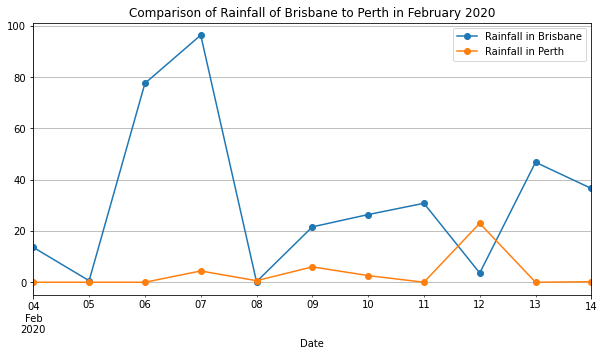

In [16]:
# Visualizing for Feb 2020
feb_2020 = (vis_df['Date'] >= '2020-2-04')  & (vis_df['Date'] <= '2020-2-14')
feb_2020 = vis_df.loc[feb_2020]
feb_2020.plot(x='Date', y=["Rainfall in Brisbane", "Rainfall in Perth"], figsize=(10,5), grid=True, marker='o', title = "Comparison of Rainfall of Brisbane to Perth in February 2020")


##### [Date Sector 2] December 10 to 24 2020

<AxesSubplot:title={'center':'Comparison of Rainfall of Brisbane to Perth in December 2020'}, xlabel='Date'>

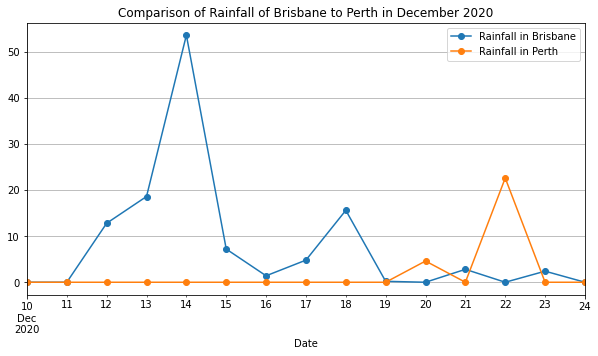

In [17]:
dec_2020 = (vis_df['Date'] >= '2020-12-10')  & (vis_df['Date'] <= '2020-12-24')
dec_2020 = vis_df.loc[dec_2020]
dec_2020.plot(x='Date', y=["Rainfall in Brisbane", "Rainfall in Perth"], figsize=(10,5), grid=True, marker='o', title = "Comparison of Rainfall of Brisbane to Perth in December 2020")

##### [Date Sector 3] December 20 to 30 2021

<AxesSubplot:title={'center':'Comparison of Rainfall of Brisbane to Perth in March 2021'}, xlabel='Date'>

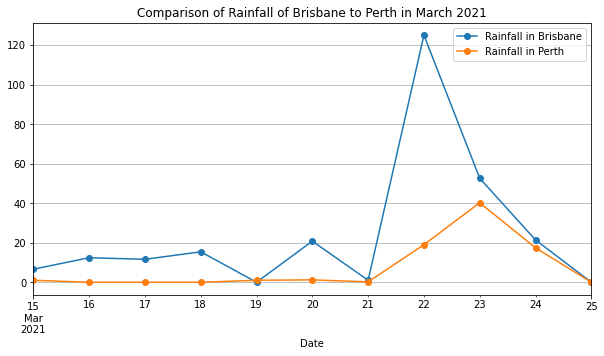

In [18]:
mar_2021 = (vis_df['Date'] >= '2021-03-15')  & (vis_df['Date'] <= '2021-03-25')
mar_2021 = vis_df.loc[mar_2021]
mar_2021.plot(x='Date', y=["Rainfall in Brisbane", "Rainfall in Perth"], figsize=(10,5), grid=True, marker='o', title = "Comparison of Rainfall of Brisbane to Perth in March 2021")



##### [Date Sector 4] March 15 to 25 2021

<AxesSubplot:title={'center':'Comparison of Rainfall of Brisbane to Perth in December 2021'}, xlabel='Date'>

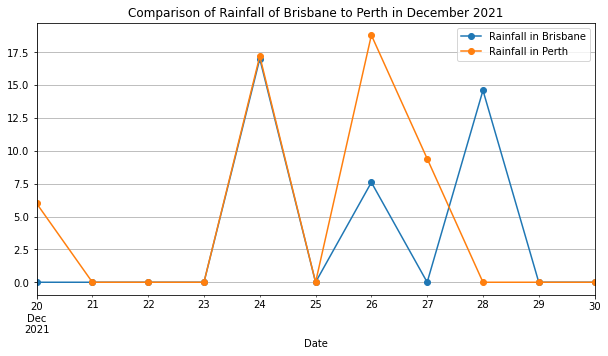

In [19]:
dec_2021 = (vis_df['Date'] >= '2021-12-20')  & (vis_df['Date'] <= '2021-12-30')
dec_2021 = vis_df.loc[dec_2021]
dec_2021.plot(x='Date', y=["Rainfall in Brisbane", "Rainfall in Perth"], figsize=(10,5), grid=True, marker='o', title = "Comparison of Rainfall of Brisbane to Perth in December 2021")


##### [Date Sector 5] February 22 to March 3 2022

<AxesSubplot:title={'center':'Comparison of Rainfall of Brisbane to Perth in February-March 2022'}, xlabel='Date'>

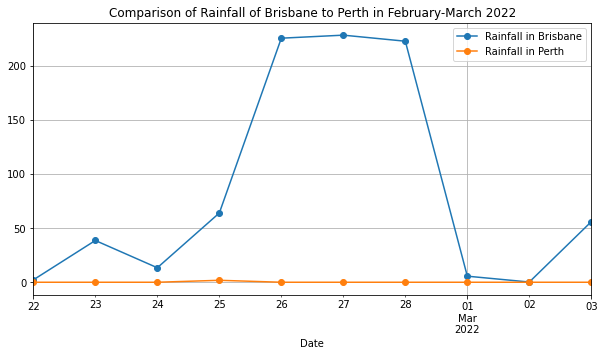

In [20]:
feb_2022 = (vis_df['Date'] >= '2022-02-22')  & (vis_df['Date'] <= '2022-03-03')
feb_2022 = vis_df.loc[feb_2022]
feb_2022.plot(x='Date', y=["Rainfall in Brisbane", "Rainfall in Perth"], figsize=(10,5), grid=True, marker='o', title = "Comparison of Rainfall of Brisbane to Perth in February-March 2022")


### 1.5 Insight

Following are the insights obtained from the analysis:
* Rainfall in Brisbane is on the rise year over year.
* On 27th February, Brisbane touched record highs of rainfall of 228.4mm. In the same month, it rained consistently high and spanned for over a week. This level of rainfall can lead to floods in the area.
* Dry months start in April and continue till September. Wet months start from October and continue until February/March of the following year. This means rains mostly occur throughout the year except in the Winter and Spring seasons.


After comparing Brisbane's rainfall data with Perth:
* Brisbane recives a higher average rainfall than Perth especially during the beginning of the year- Jan-Feb. Snmetimes in the end of the year (Nov-Dec), Perth recives a higher average rainfall.
* During the month of February 2022, Brisbane received a substantially high amount of rainfall. Perth did not recieve any rainfall at this time. This means the East Coast of Australia was under the influence of winds and low pressure belts. This did not affect the West Coast.



Meteorologists, forecasters and other stakeholders can use this analyses to provide warnings so that relevant parties can prepare to prevent events such as flooding in the future.


It can also provide them insights to analyse what events are causing the massive amount of rainfall in the East Coast. Is it winds, pressure belts, the oceans, et cetra. Why is the climate changing and why is the rainfall increasing every year in this region? With such analyses, we get one step closer to finding the solution that can adresses bigger problems.

---
## QUESTION 2

#### Question: 
Using *The Guardian* API, compare Australian and United Kingdom headlines about the war in Ukraine. What can we learn about differences and similarities between the news presented to Australia and the UK?

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [21]:
# import libraries for this question here
import requests
import json

### 2.1 Question

On 24 February 2022, Russia invaded Ukraine marking a steep escalation of the Russo-Ukrainian War, which began in 2014. Many countries stood up against Russia and made economic sanctions to Russia in hopes that it would help dissolve the war. In this process, many countries and their political leaders got involved and it became highly talked about throughout the world.

The Guardian is a very popular daily news paper that started in Britian. They are also a platform that offers their full archive of content via API (Application Programming Interface). Developers can pull this data by making requests to the API.

The aim of this analysis is to pull news headlines relevant to the war in Ukraine using The Guardian's OpenPlatform API. The data will be pulled in 2 sections:
- News Released by Australia
- News Released by the UK


The data should be processed and put in such a way that the headlines of these published articles can be easily compared. 
Insights that we aim to gain:
* Which country reports more about the war? AU or UK?
* What do these countries talk about? Are they reporting similar news?
* How are these countries affected by the war? Which country is more affected?
* Which country is more aggressive/taking more action against the war? 

Our key stakeholders in this case can be a international organisation or the UN. Effective policies taken by certain countries can be followed by other countries as well so we can say political leaders are also our potential stakeholders. Overall we want to understand the effects, trends and the wave of sentiments the war has caused across these 2 countries and what is being done to combat the situation.

### 2.2 Data

After going through Guardian Open Platform API, and learning how to call the data from the API, here are the observations made:
- An API key is needed to make calls to the API. Guardian open platform provides a free API key for developers.
- It is possible to segregate or filter the data by section, tags, production office, start date, end date, page size, order by date, references, fields, rights, etc. We will be using some of these filters in our Analysis.

In [22]:
# Access the data via API
with open('../private/guardian_key.txt', 'r') as file:
    key = file.read().strip()
          
# Clean/prepare the data for analysis
baseUrl = 'https://content.guardianapis.com/search?q='
searchString = "war in ukraine"
#We will consider 50 country specific headlines
pageSize = "50"

#aus specific
production_office_au = "aus"
section_au = "australia-news"

#uk specific
production_office_uk = "uk"
section_uk = "uk-news"

# According to Google, the Russo-Ukrainian War started on 20th Feb 2020 and is still ongoing, so we will start looking for news from this date
fromDate = "2014-02-20"

au_url = baseUrl+'"'+searchString+'"'+'&page-size='+pageSize+'&section='+section_au+'&production-office='+production_office_au+'&from-date='+fromDate+'&api-key='+key
uk_url = baseUrl+'"'+searchString+'"'+'&page-size='+pageSize+'&section='+section_uk+'&production-office='+production_office_uk+'&from-date='+fromDate+'&api-key='+key

In [23]:
#Get Australian headlines about the war
response_au = requests.get(au_url)
data_au = json.loads(response_au.content)
data_au

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 47,
  'startIndex': 1,
  'pageSize': 50,
  'currentPage': 1,
  'pages': 1,
  'orderBy': 'relevance',
  'results': [{'id': 'australia-news/2022/mar/09/zoe-daniels-court-challenge-over-sign-ban-will-have-ramifications-for-the-entire-state-says-judge',
    'type': 'article',
    'sectionId': 'australia-news',
    'sectionName': 'Australia news',
    'webPublicationDate': '2022-03-09T08:16:00Z',
    'webTitle': 'Zoe Daniel’s court challenge over sign ban ‘will have ramifications for the entire state’, says judge',
    'webUrl': 'https://www.theguardian.com/australia-news/2022/mar/09/zoe-daniels-court-challenge-over-sign-ban-will-have-ramifications-for-the-entire-state-says-judge',
    'apiUrl': 'https://content.guardianapis.com/australia-news/2022/mar/09/zoe-daniels-court-challenge-over-sign-ban-will-have-ramifications-for-the-entire-state-says-judge',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName':

In [24]:
#Get the United Kingdom headlines about the war
response_uk = requests.get(uk_url)
data_uk = json.loads(response_uk.content)
data_uk

{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 19,
  'startIndex': 1,
  'pageSize': 50,
  'currentPage': 1,
  'pages': 1,
  'orderBy': 'relevance',
  'results': [{'id': 'uk-news/2022/mar/23/russian-couple-who-protested-against-war-in-ukraine-claim-asylum-in-uk',
    'type': 'article',
    'sectionId': 'uk-news',
    'sectionName': 'UK news',
    'webPublicationDate': '2022-03-23T06:00:22Z',
    'webTitle': 'Russian couple who protested against war in Ukraine claim asylum in UK',
    'webUrl': 'https://www.theguardian.com/uk-news/2022/mar/23/russian-couple-who-protested-against-war-in-ukraine-claim-asylum-in-uk',
    'apiUrl': 'https://content.guardianapis.com/uk-news/2022/mar/23/russian-couple-who-protested-against-war-in-ukraine-claim-asylum-in-uk',
    'isHosted': False,
    'pillarId': 'pillar/news',
    'pillarName': 'News'},
   {'id': 'uk-news/2022/feb/18/digested-week-prospect-war-ukraine-deserve-more-than-sad-face-emoji',
    'type': 'article',
    'sectionI

### 2.3 Analysis

Let us have a look what each segment of the API response looks like and where we want to focus. I will be using `data_au` for this purpose.


In [25]:
type(data_au)

dict

Response is of type JSON stored in a python dictionary, let us read the keys of the dictionary.

In [26]:
data_au.keys()

dict_keys(['response'])

The only key that shows here is response. This denotes it is a standard JSON response. We need to look at data and keys stored inside the response key.

In [27]:
results_au = data_au['response']['results']
#Get first element of list
results_au[0]

{'id': 'australia-news/2022/mar/09/zoe-daniels-court-challenge-over-sign-ban-will-have-ramifications-for-the-entire-state-says-judge',
 'type': 'article',
 'sectionId': 'australia-news',
 'sectionName': 'Australia news',
 'webPublicationDate': '2022-03-09T08:16:00Z',
 'webTitle': 'Zoe Daniel’s court challenge over sign ban ‘will have ramifications for the entire state’, says judge',
 'webUrl': 'https://www.theguardian.com/australia-news/2022/mar/09/zoe-daniels-court-challenge-over-sign-ban-will-have-ramifications-for-the-entire-state-says-judge',
 'apiUrl': 'https://content.guardianapis.com/australia-news/2022/mar/09/zoe-daniels-court-challenge-over-sign-ban-will-have-ramifications-for-the-entire-state-says-judge',
 'isHosted': False,
 'pillarId': 'pillar/news',
 'pillarName': 'News'}

We notice that headlines are stored under the `'webtitle'` section of the response data. Let us extract all these headlines and put them into a single list

In [28]:
# Extract for Australian headlines
au_headlines = []
for result in results_au:
    au_headlines.append(result['webTitle'])
    
au_headlines   #Returns 46 results obtained from the API

['Zoe Daniel’s court challenge over sign ban ‘will have ramifications for the entire state’, says judge',
 '‘It’s not 2018’: Matthew Guy learns to open up and unite his party',
 'Morning mail: UN votes to condemn Russia, flood-hit Australians struggle for news, row over refugee intake',
 'Russia’s murderous regime is propped up by oil and gas – Australia must switch | Ketan Joshi',
 'Melbourne radio station 3ZZZ suspends Russian-language broadcaster over Ukraine war reports',
 'More than 90% of Australia’s fuel imported – leaving country vulnerable to shortages, report says',
 'Morning mail: Nato agrees on weapons supply to Ukraine, North Korea launches missile, Australia’s coal donation under scrutiny',
 'Morning mail: Russia suspended from UN human rights council, fresh Aukus controversy, record frogs',
 'Morning mail: food crisis warning over Ukraine war, Australia’s soaring cost of living, Covid lockdown in China',
 'Scott Morrison signals budget measures to counter soaring petrol 

It looks like some news headlines extracted from the API do not have any relevance to the war in Ukraine

In [29]:
#Example headlines that do not have anything to do with the war 
au_headlines[:2]

['Zoe Daniel’s court challenge over sign ban ‘will have ramifications for the entire state’, says judge',
 '‘It’s not 2018’: Matthew Guy learns to open up and unite his party']

Let us apply a *filter* to extract only relevant news for our analysis.

In [30]:
#Popular keywords used in headlines to be extract
approved = ['Ukraine','war', 'Russia', 'Russian', 'Ukraninan', "Russias", "Ukraines", "Russians", "Ukrainains", "Putin", "Zelensky"]
filtered_au_headlines= []

for headlines in au_headlines:
    headline = headlines.replace(',', '')
    headline = headline.replace('’', '')
    headlines_split= headline.split()
    for a in approved: 
        if a in headlines_split:
            filtered_au_headlines.append(headlines)
            break

filtered_au_headlines

['Morning mail: UN votes to condemn Russia, flood-hit Australians struggle for news, row over refugee intake',
 'Russia’s murderous regime is propped up by oil and gas – Australia must switch | Ketan Joshi',
 'Melbourne radio station 3ZZZ suspends Russian-language broadcaster over Ukraine war reports',
 'Morning mail: Nato agrees on weapons supply to Ukraine, North Korea launches missile, Australia’s coal donation under scrutiny',
 'Morning mail: Russia suspended from UN human rights council, fresh Aukus controversy, record frogs',
 'Morning mail: food crisis warning over Ukraine war, Australia’s soaring cost of living, Covid lockdown in China',
 'As war unfolds in her homeland, Solomiya Rozhko adjusts to a ‘painful’ new reality in Brisbane',
 'Australian government extends sanctions to Russian oligarchs Oleg Deripaska and Viktor Vekselberg ',
 'Morning mail: fears over China and Russia, Mariupol evacuation attempt, Australians wait for excise cut',
 'Morning mail: claims of forced dep

In [31]:
# Extract for UK's headlines
results_uk = data_uk['response']['results']

uk_headlines = []
for result in results_uk:
    uk_headlines.append(result['webTitle'])
    
uk_headlines  #Returns 19 results obtained from the API

['Russian couple who protested against war in Ukraine claim asylum in UK',
 'Digested week: prospect of war in Ukraine deserves more than sad face emojis | Emma Brockes',
 'Friend or foe? The UK cities cutting ties with Russian twins',
 'A megalopolis of engineering: the verdict on London’s £18bn new Elizabeth line',
 'Spring statement 2022: key points at a glance',
 'What are the visa rules for Ukrainians wishing to come to UK?',
 'The green policies left out of Rishi Sunak’s spring statement',
 'Labour calls for increase in defence spending',
 'Experts raise doubts over plan for Royal Navy to control Channel crossings',
 'Sunak says spring statement is ‘progressive’ in response to criticism from MPs',
 'Ukrainian workers flee ‘modern slavery’ conditions on UK farms',
 'Oligarchs selling UK property to avoid new register may have to declare details',
 'Sunak’s statement only ‘scratches the surface’ on energy efficiency',
 'A mini budget full of lies from Rishi Sunak, the people’s mill

In [32]:
#Filtering UK headlines

filtered_uk_headlines= []

for headlines in uk_headlines:
    headline = headlines.replace(',', '')
    headline = headline.replace('’', '')
    headlines_split= headline.split()
    for a in approved: 
        if a in headlines_split:
            filtered_uk_headlines.append(headlines)
            break

filtered_uk_headlines

['Russian couple who protested against war in Ukraine claim asylum in UK',
 'Digested week: prospect of war in Ukraine deserves more than sad face emojis | Emma Brockes',
 'Friend or foe? The UK cities cutting ties with Russian twins',
 'Putin has already deployed a chemical weapon. In Salisbury',
 'Questions mount amid eagerness in UK to help Ukraine refugees',
 'Extradition request for Russian suspects has zero chance of success']

In [33]:
headlines = { "Australia headlines" : filtered_au_headlines, "uk_headlines": filtered_uk_headlines}
comparing_headlines = pd.DataFrame({ key:pd.Series(value) for key, value in headlines.items() })

<h5><a id='comparison_table'>Table of Comparison</a></h5>

<p> We seek to create a table that compares both these countries headlines side by side in a pretty format to facilitate easier analysis.

In [34]:
from IPython.display import display, HTML

def wrap_df_text(df):
    return display(HTML(comparing_headlines.to_html().replace("\\n","<br>")))

wrap_df_text(comparing_headlines)


,Australia headlines,uk_headlines
0,"Morning mail: UN votes to condemn Russia, flood-hit Australians struggle for news, row over refugee intake",Russian couple who protested against war in Ukraine claim asylum in UK
1,Russia’s murderous regime is propped up by oil and gas – Australia must switch | Ketan Joshi,Digested week: prospect of war in Ukraine deserves more than sad face emojis | Emma Brockes
2,Melbourne radio station 3ZZZ suspends Russian-language broadcaster over Ukraine war reports,Friend or foe? The UK cities cutting ties with Russian twins
3,"Morning mail: Nato agrees on weapons supply to Ukraine, North Korea launches missile, Australia’s coal donation under scrutiny",Putin has already deployed a chemical weapon. In Salisbury
4,"Morning mail: Russia suspended from UN human rights council, fresh Aukus controversy, record frogs",Questions mount amid eagerness in UK to help Ukraine refugees
5,"Morning mail: food crisis warning over Ukraine war, Australia’s soaring cost of living, Covid lockdown in China",Extradition request for Russian suspects has zero chance of success
6,"As war unfolds in her homeland, Solomiya Rozhko adjusts to a ‘painful’ new reality in Brisbane",NaN
7,Australian government extends sanctions to Russian oligarchs Oleg Deripaska and Viktor Vekselberg,NaN
8,"Morning mail: fears over China and Russia, Mariupol evacuation attempt, Australians wait for excise cut",NaN
9,"Morning mail: claims of forced deportations from Ukraine, plight of 51 asylum seekers, best Bluey episodes",NaN


### 2.4 Visualisation

Analyzing news reports more deeply requires text mining, sentiment analysis and more advanced algorithms. For the sake of visualisation in this case, let us stick to analyzing the difference in number of news reported.

Text(0, 0.5, 'Country')

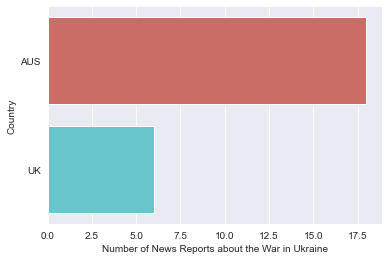

In [35]:
# Visualise the results
no_of_news_reported = [len(filtered_au_headlines), len(filtered_uk_headlines)]
country = ["AUS", "UK"]

no_of_news_reported
sns.set_style('darkgrid')
ax = sns.barplot(x=no_of_news_reported, y=country, palette = 'hls')
ax.set_xlabel("Number of News Reports about the War in Ukraine")
ax.set_ylabel("Country")


### 2.5 Insight

The main question at hand is - **What can we learn about differences and similarities between the news presented to Australia and the UK?**

After analysing the [Table of Comparison](#comparison_table), here are a few observations:
* Australian news agencies report more about the war than the UK.
* Australia takes more stringent action, or, seems to be more aggresive in the war against Russia. They have strict sanctions in place and aim to switch their oil and gas imports from Russia.
* The UK seem to have more ties to Russia. They don't seem to be condemning Russia as much as Australia in their reports. They cite cutting ties with Russian twins whom they address "friends or foes".
* Strong economic sanctions are implemented by Australia, such as banning imports of oil and petroleum, extending sanctions to Russian oligarchs, et cetra.
* UK news doesn't talk much about economic sactions by the country. However, they do talk about housing Ukrainian refugees. 
* From the headlines, it is very clear that Australia stand against Russia in the war. They are providing lethal aid to Ukraine and also implementing strong sanctions against Russia. They have openly expressed that they are against the war and the invading country.
* It is, however, not so clear in the case of UK. Sure, they are not happy with the war and the proceedings, but they seem to not have taken any stringent measures against the invading nation like Australia. What they are doing about the situation mostly include providing refuge to Ukraine and Ukraine's supporters in Russia.

How is this information useful?
* Is the policies taken against Russia by Australia proving to be of any help? If yes, international organisations can extend the offer to other countries to follow similar policies.
* Australia may take a page or 2 from UK's books if deemed necessary and talk about how they plan to support the common people of Ukraine, or about extending them a home. They may also consider Ukraine supporting Russians banished from their country.
* The analysis also exhibits these countries contrasting relationship with Russia. UK seems hesitant to take stringent measures against Russia because of their former ties.
